## Introduction

Imagine you are working for an organization that offers advanced certifications in various courses. Your objective is to analyze a dataset that contains information about how leads are acquired, categorized and converted.

Given the dataset, which includes the following columns:
1. Channel_group: Acquisition channel through which the lead was generated.
2. Course: The course the lead showed interest in.
3. Lead_id: A unique identifier for each lead.
4. Lead_type: The type of interaction through which the lead was generated.
5. Lead_date: The date when the lead was created
6. Other intuitive columns…..

You need to:
1. Identify the top 5 insights from this dataset.
2. Make clear assumptions if necessary.

Your analysis should highlight trends, patterns, or any other meaningful observations that could help the organization understand how leads are generated and how they interact with courses.

In [1]:
!pip3 install -r requirements.txt --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

plt.rcParams['figure.figsize'] = (25,6)
plt.rcParams['font.size'] = 17
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
df =  pd.read_csv('SDA_assignment.csv')
df['lead_id'] = df['lead_id'].str.replace(",", "")
df['lead_id'] = pd.to_numeric(df['lead_id'])
df['lead_date'] = pd.to_datetime(df['lead_date'], dayfirst=True)
df['paid_at'] = pd.to_datetime(df['paid_at'], dayfirst=True)
df['days_diff'] = (df['paid_at'] - df['lead_date']).dt.days
df.head()

,Channel_group,course,lead_id,Lead_type,lead_date,graduation_year,amount_paid,paid_at,days_diff
0,A,Java,142649,ABC,2024-05-17 17:53:00,2008,NaN,NaT,NaN
1,A,Java,4163228,XYZ,2024-05-25 15:23:00,2009,NaN,NaT,NaN
2,B,Java,4176457,EFG,2024-05-06 10:12:00,2000,NaN,NaT,NaN
3,A,Java,136989,ABC,2024-05-16 12:31:00,2009,NaN,NaT,NaN
4,C,Java,140085,ABC,2024-05-01 20:35:00,2002,NaN,NaT,NaN


In [4]:
n_rows, n_cols = df.shape
print(f"There are {n_rows:,} rows and {n_cols} columns in the dataset.")

There are 16,460 rows and 9 columns in the dataset.


In [5]:
df.dtypes

Channel_group              object
course                     object
lead_id                     int64
Lead_type                  object
lead_date          datetime64[ns]
graduation_year             int64
amount_paid               float64
paid_at            datetime64[ns]
days_diff                 float64
dtype: object

In [6]:
df.describe()

,lead_id,lead_date,graduation_year,amount_paid,paid_at,days_diff
count,1.646000e+04,16460,16460.000000,648.000000,648,648.000000
mean,1.744383e+06,2024-05-16 13:43:46.159173632,2014.992892,41670.317901,2024-05-24 11:14:00.833333248,7.944444
min,1.282210e+05,2024-05-01 00:03:00,2000.000000,31611.000000,2024-05-02 00:46:00,1.000000
25%,1.345788e+05,2024-05-08 18:47:30,2007.000000,32149.000000,2024-05-20 06:49:30,2.750000
50%,1.408700e+05,2024-05-16 12:43:00,2015.000000,44604.000000,2024-05-26 12:20:30,6.000000
75%,4.158101e+06,2024-05-24 09:52:45,2023.000000,48402.000000,2024-05-29 22:26:15,12.000000
max,4.211067e+06,2024-05-31 23:58:00,2030.000000,48402.000000,2024-06-01 23:48:00,29.000000
std,1.972833e+06,NaN,9.006111,6650.902936,NaN,6.541509


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Channel_group    16460 non-null  object        
 1   course           16460 non-null  object        
 2   lead_id          16460 non-null  int64         
 3   Lead_type        16460 non-null  object        
 4   lead_date        16460 non-null  datetime64[ns]
 5   graduation_year  16460 non-null  int64         
 6   amount_paid      648 non-null    float64       
 7   paid_at          648 non-null    datetime64[ns]
 8   days_diff        648 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [8]:
conn =  sqlite3.connect('acquistions.db')
df.to_sql('leads', conn, if_exists='replace', index=False)

16460

## Channel Group

In [9]:
query = '''
select Channel_group, 
        round(count(*)*100.0/(select count(*) from leads),2) as Leads_Pct
from leads 
group by 1 
order by 2 desc
'''
Channel_group = pd.read_sql(query, conn)
Channel_group

,Channel_group,Leads_Pct
0,A,48.19
1,M,10.01
2,F,9.64
3,D,7.86
4,E,6.56
5,H,4.77
6,B,4.50
7,C,4.08
8,G,2.67
9,I,1.28



- **Observation**: Channel A generates the most leads, accounting for 48.19% of total leads.

- **So What?** - This indicates that Channel A is the most effective lead generation source, suggesting a strong alignment with target audience needs or preferences. The high percentage of leads from this channel highlights its critical role in the overall marketing strategy.

- **Action**: To maximize lead generation, businesses should prioritize investment in Channel A by enhancing marketing efforts, optimizing campaigns, and allocating resources for better engagement. Additionally, analyzing the strategies that make Channel A successful can provide insights for improving other channels and overall lead generation effectiveness.

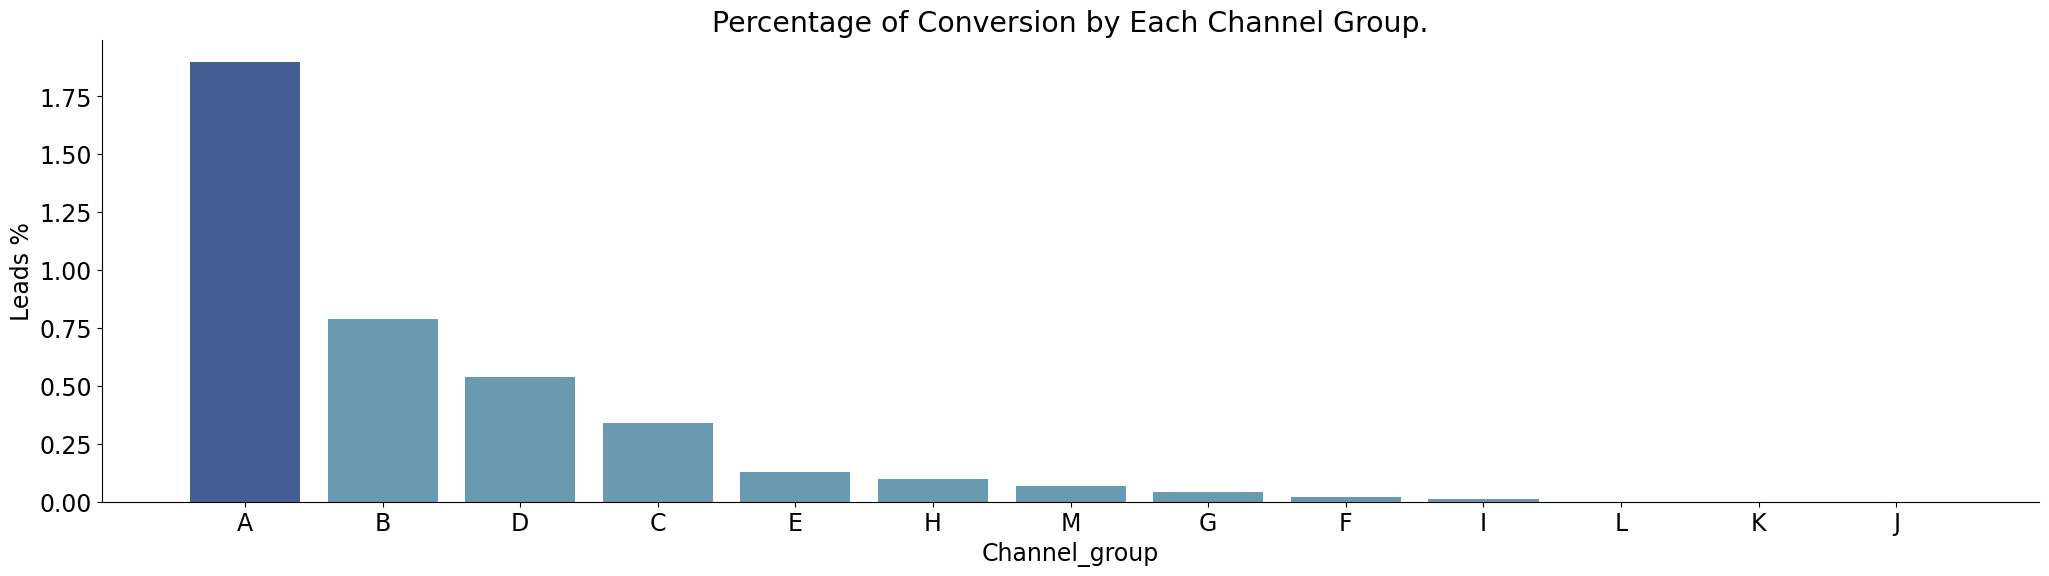

In [10]:
query = '''
select Channel_group, round(count(amount_paid)*100.0 / (select count(*) from leads),2) as Conv_Rate 
from leads group by 1 order by 2 desc
'''
channel_conv = pd.read_sql(query, conn)
COLORS =['#6A9AB0'] * len(channel_conv)
COLORS[0] = '#445e93'
plt.bar(channel_conv['Channel_group'], height=channel_conv['Conv_Rate'], color=COLORS)
plt.ylabel('Leads %')
plt.title('Percentage of Conversion by Each Channel Group.')
plt.xlabel('Channel_group')
plt.show()

- **Observation**: The highest conversion rates are from Channel A (1.90%), Channel B (0.79%), and Channel D (0.54%), while Channels L, K, and J recorded zero conversions.

- **So What?**: This indicates that Channels A, B, and D are significantly more effective at converting leads into customers compared to others. The absence of conversions from Channels L, K, and J suggests that these channels may not resonate with the target audience or require reevaluation.

- **Action**: Focus on optimizing and scaling successful strategies from Channels A, B, and D to enhance overall conversion rates. Simultaneously, conduct a thorough analysis of Channels L, K, and J to identify the underlying issues and either improve their performance or consider reallocating resources to more effective channels.

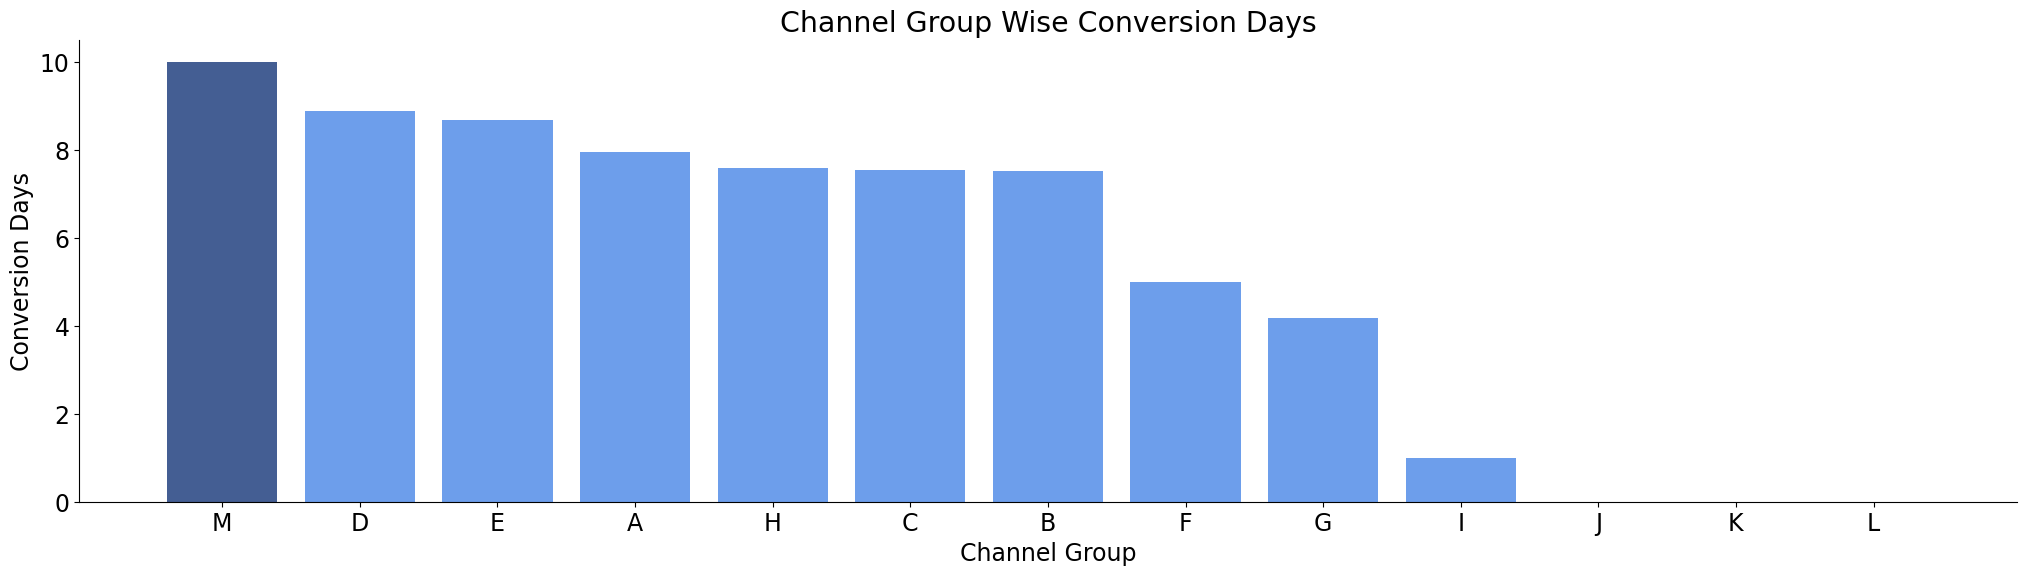

In [11]:
channel_days_diff = round(df.groupby('Channel_group')['days_diff'].mean().fillna(0)\
                          .sort_values(ascending=False),2).to_frame().reset_index()
light_blue ='#6d9eeb'
dark_blue = '#445e93'
COLORS =[light_blue] * len(channel_days_diff)
COLORS[0] = dark_blue
plt.bar(data=channel_days_diff, x='Channel_group', height = 'days_diff', color=COLORS)
plt.title('Channel Group Wise Conversion Days')
plt.ylabel('Conversion Days')
plt.xlabel('Channel Group')
plt.show()

- **Observation:** The highest payment realization time is from Channel M (10 days), followed by Channel D (8.87 days) and Channel E (8.67 days). Channels J, K, and L recorded no payment realization time due to the absence of leads.

- **So What?:** This suggests that Channels M, D, and E have longer payment cycles, which could indicate either a complex sales process or delayed customer decision-making. In contrast, the lack of payment realization time from Channels J, K, and L highlights their ineffectiveness in generating leads.

- **Action:** Evaluate the payment processes and customer engagement strategies for Channels M, D, and E to identify ways to expedite payment realization. Additionally, consider reassessing or enhancing the lead generation strategies for Channels J, K, and L, as they currently do not contribute to revenue.

In [12]:
channel_pivot = round(df.pivot_table(index='Channel_group', columns='course', 
                                     aggfunc='size', fill_value=0)/len(df)*100,2)\
                .reset_index().rename_axis(columns=None)
channel_pivot

,Channel_group,CRM,Figma,Google Analytics,Guitar,Java,Python,SEO
0,A,6.22,3.21,4.34,6.85,12.54,12.32,2.71
1,B,0.68,0.27,0.41,0.66,1.34,0.88,0.27
2,C,0.53,0.22,0.32,0.52,1.03,1.16,0.29
3,D,0.89,0.63,0.73,0.76,2.92,1.48,0.45
4,E,1.13,0.44,0.32,0.49,2.10,1.57,0.52
5,F,2.33,0.00,0.00,0.64,3.18,3.49,0.00
6,G,0.48,0.20,0.14,0.47,0.70,0.51,0.16
7,H,0.59,0.38,0.44,0.66,1.11,1.33,0.26
8,I,0.14,0.05,0.10,0.13,0.28,0.51,0.07
9,J,0.02,0.00,0.00,0.01,0.04,0.00,0.00


- **Observation:** Channel Group A consistently generates the highest leads across all categories, particularly in Java (12.54%) and Python (12.32%). In contrast, Channels B, C, D, and others show significantly lower values, with Channel K producing the least across most metrics.

- **So What?**: The strong performance of Channel A suggests it is an effective lead acquisition channel, especially for high-value courses like Java and Python. This indicates that there is a potential for higher returns on investment if marketing and resources are focused on this channel. Meanwhile, the low performance of Channels B and K highlights a need for further investigation to determine whether these channels can be optimized or whether they should be deprioritized in the strategy.

- **Action:** Allocate more resources and targeted marketing efforts towards Channel A to maximize lead generation and revenue. For Channels B and K, conduct a thorough analysis to understand the factors contributing to their low performance and implement strategies for improvement. This could involve adjusting the messaging, exploring different audience segments, or re-evaluating the product offerings to enhance their effectiveness in generating leads.

## Course

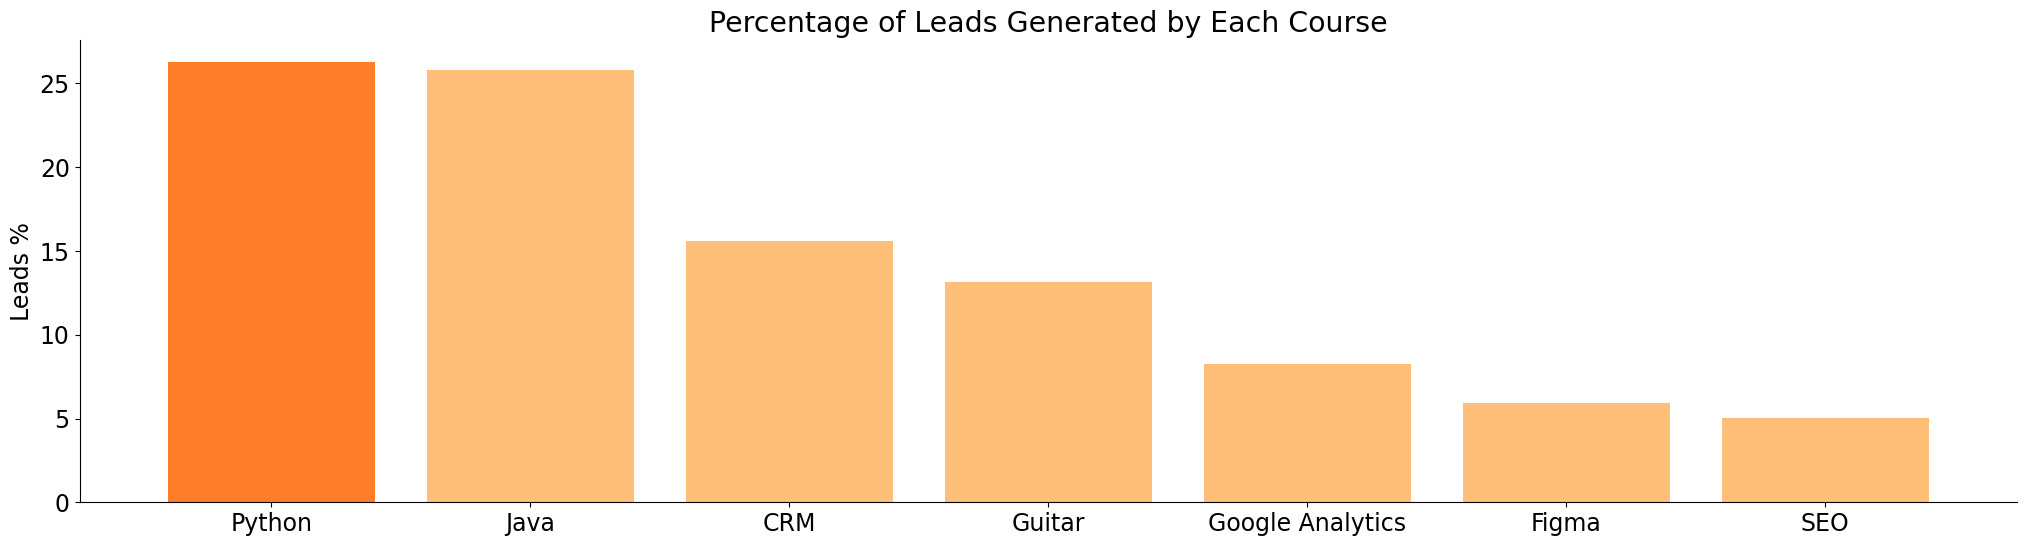

In [13]:
query = '''
select course, round(count(*)*100.0/(select count(*) from leads),2) as Leads 
from leads 
group by 1 
order by 2 desc
'''
course_leads = pd.read_sql(query, conn)
COLORS =['#FFBF78'] * len(course_leads)
COLORS[0] = '#FF7D29'
plt.bar(course_leads['course'], height=course_leads['Leads'], color=COLORS)
plt.ylabel('Leads %')
plt.title('Percentage of Leads Generated by Each Course')
plt.show()

- **Observation:** : Python leads the course offerings with 26.26 leads, followed closely by Java with 25.82 leads. Other courses such as CRM (15.58), Guitar (13.15), Google Analytics (8.25), Figma (5.92), and SEO (5.01) show significantly lower lead counts.

- **So What?** : The high lead counts for Python and Java indicate strong interest in these courses, suggesting they align well with market demand and current trends in technology. In contrast, the lower lead counts for courses like Figma and SEO may suggest a lack of awareness or perceived value among potential learners, indicating an opportunity for improvement in marketing or course offerings.

- **Action:** To capitalize on the strong interest in Python and Java, consider increasing marketing efforts, such as targeted campaigns, webinars, or promotional discounts for these courses. For the courses with lower lead counts, conduct market research to understand potential barriers to enrollment, and explore strategies to enhance their visibility and perceived value, such as showcasing real-world applications or offering free introductory sessions.

In [14]:
lead_pivot = round(df.pivot_table(index='course', columns='Lead_type', aggfunc='size', fill_value=0)/len(df)*100,2)\
                .reset_index().rename_axis(columns=None)
lead_pivot

,course,ABC,EFG,LMN,XYZ
0,CRM,5.19,7.24,0.55,2.61
1,Figma,3.29,1.45,0.13,1.06
2,Google Analytics,4.00,2.71,0.27,1.26
3,Guitar,4.58,4.93,0.36,3.27
4,Java,10.05,9.36,0.08,6.33
5,Python,10.37,10.86,0.53,4.50
6,SEO,2.93,1.23,0.08,0.77


- **Observation:**: Python leads across all channels with 10.37 in ABC and 10.86 in EFG, followed closely by Java with 10.05 in ABC and 9.36 in EFG. Guitar (4.58 in ABC, 4.93 in EFG) and Google Analytics (4.00 in ABC, 2.71 in EFG) show moderate performance, while CRM, Figma, and SEO have the lowest values across most channels.

- **So What?** : The strong performance of Python and Java indicates these courses are highly sought after, which could translate to higher revenue potential. The consistent lead generation across the ABC and EFG channels suggests effective marketing strategies in place for these courses. Conversely, the lower performance of CRM, Figma, and SEO indicates these courses may not resonate with potential customers, potentially due to a lack of demand or ineffective marketing efforts.

- **Action**: To maximize revenue, focus on promoting Python and Java through enhanced marketing strategies, including special offers or partnerships with tech companies. For courses like CRM, Figma, and SEO, consider conducting surveys or market research to identify barriers to enrollment. Develop targeted campaigns to increase awareness and showcase the value of these courses, perhaps by highlighting industry relevance or career advancement opportunities.

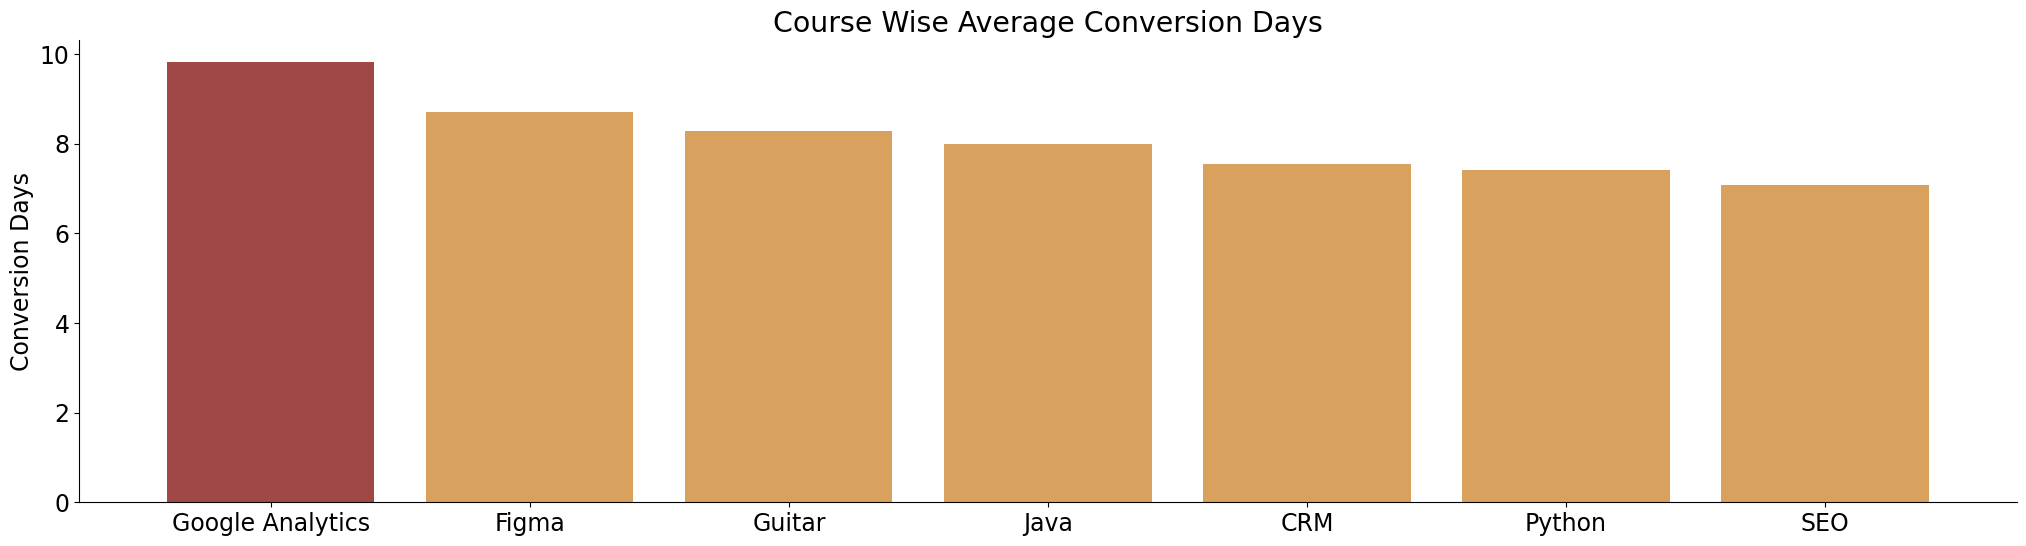

In [15]:
course_days_diff = round(df.groupby('course')['days_diff'].mean().fillna(0)\
                         .sort_values(ascending=False),2).to_frame().reset_index()

COLORS =['#D8A25E'] * len(course_days_diff)
COLORS[0] = '#A04747'

plt.bar(data=course_days_diff, x='course', height = 'days_diff', color=COLORS)
plt.title('Course Wise Average Conversion Days')
plt.ylabel('Conversion Days')
plt.show()

- **Observation**: Google Analytics has the highest average days difference between lead creation and payment at 9.82 days, followed by Figma at 8.70 days. In contrast, SEO has the lowest average at 7.09 days, indicating faster payment realization compared to the other courses.

- **So What?**: The longer payment realization times for Google Analytics and Figma may suggest complexities in the sales process or potential issues in lead conversion. In contrast, the quicker payment realization for SEO indicates a more efficient conversion process, highlighting its effectiveness as a lead type.

- **Action** : Evaluate the sales processes for Google Analytics and Figma to identify any bottlenecks or challenges contributing to the longer payment times. Implement strategies to streamline these processes and improve conversion rates. Additionally, analyze the factors contributing to the quick payment realization for SEO to replicate its success across other courses.

## Trends

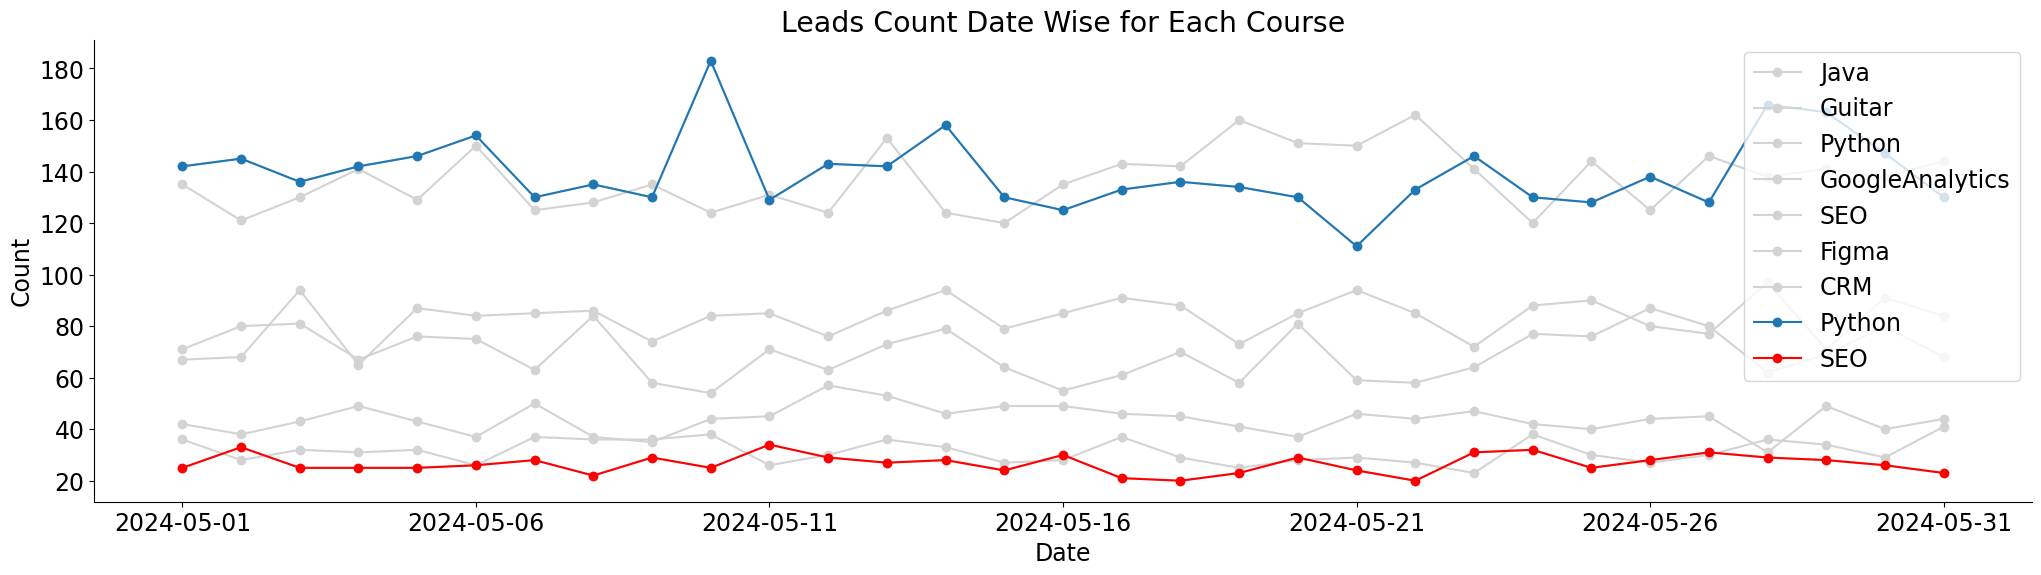

In [16]:
query = '''
select strftime("%Y-%m-%d", lead_date) as date,
    sum(case when course='Java' then 1 else 0 end) as Java,
    sum(case when course='Guitar' then 1 else 0 end) as Guitar,
    sum(case when course='Python' then 1 else 0 end) as Python,
    sum(case when course='Google Analytics' then 1 else 0 end) as GoogleAnalytics,
    sum(case when course='SEO' then 1 else 0 end) as SEO,
    sum(case when course='Figma' then 1 else 0 end) as Figma,
    sum(case when course='CRM' then 1 else 0 end) as CRM
from leads 
group by 1 
order by 1 asc
'''
# Fetch the data
date_wise_leads = pd.read_sql(query, conn)
# Set the index for plotting
date_wise_leads.set_index('date', inplace=True)

# Plot all courses in muted color first
date_wise_leads.plot(marker='o', color='lightgray', legend=False)

# Overlay Python and SEO in a different color
plt.plot(date_wise_leads.index, date_wise_leads['Python'], marker='o', color='C0', label='Python')
plt.plot(date_wise_leads.index, date_wise_leads['SEO'], marker='o', color='red', label='SEO')

# Title and labels
plt.title('Leads Count Date Wise for Each Course')
plt.ylabel('Count')
plt.xlabel('Date')

# Add a legend to differentiate
plt.legend()

# Show the plot
plt.show()

- **Observation:**  Java course is consistently generating the highest number of leads during the month of May 2024, followed by Python and Guitar. Notably, the lead count for CRM is significantly lower compared to other courses.

- **So What?** - The strong performance of Java and Python indicates high demand for these courses, likely due to their relevance in the current job market and technology landscape. The consistently lower lead count for CRM suggests it may not be as appealing or relevant to potential customers, which could reflect a lack of interest or a need for a marketing boost.

- **Action:** Focus marketing efforts on promoting Java and Python courses to capitalize on their popularity. Consider developing targeted campaigns or partnerships to enhance the visibility of CRM courses. Additionally, conduct market research to understand the perceived value of the CRM course and identify potential barriers to its enrollment, allowing for adjustments to course content or marketing strategies.

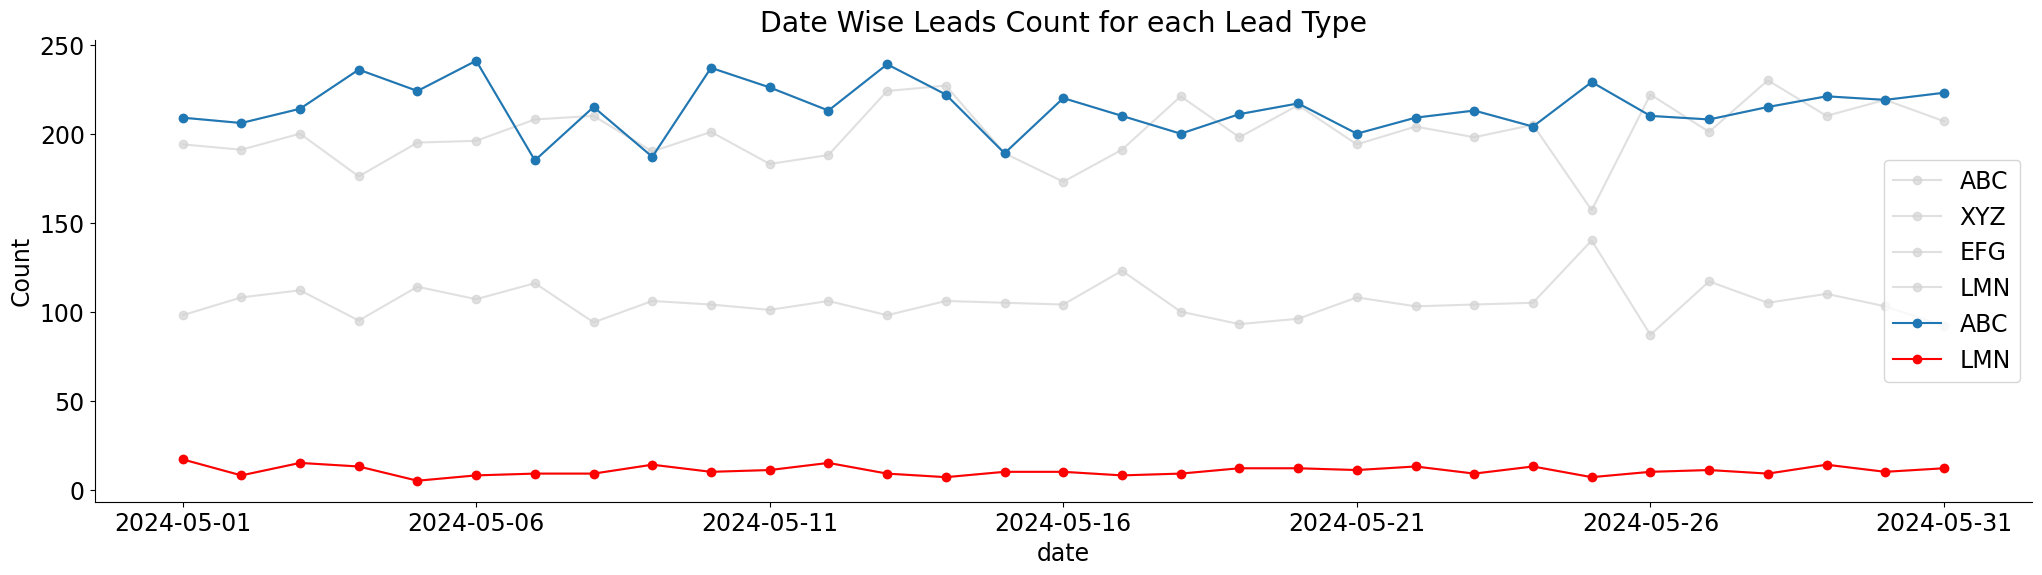

In [17]:
query = '''
select strftime("%Y-%m-%d", lead_date) as date,
    sum(case when Lead_type='ABC' then 1 else 0 end) as ABC,
    sum(case when Lead_type='XYZ' then 1 else 0 end) as XYZ,
    sum(case when Lead_type='EFG' then 1 else 0 end) as EFG,
    sum(case when Lead_type='LMN' then 1 else 0 end) as LMN
from leads 
group by 1 
order by 1 asc
'''
date_wise_leads = pd.read_sql(query, conn)
date_wise_leads.set_index('date', inplace=True)
# Plot all courses in muted color first
date_wise_leads.plot(marker='o', color='lightgray', alpha=0.7,  legend=False)
# Overlay Python and SEO in a different color
plt.plot(date_wise_leads.index, date_wise_leads['ABC'], marker='o', color='C0', label='ABC')
plt.plot(date_wise_leads.index, date_wise_leads['LMN'], marker='o', color='red', label='LMN')
plt.title('Date Wise Leads Count for each Lead Type')
plt.ylabel('Count')
plt.legend()
plt.show()

- **Observation:** ABC consistently generates the highest lead count across all dates, with a significant spike on May 6 (241 leads). XYZ shows variable performance, while LMN lags significantly behind all other lead types, with the lowest lead counts throughout the month.

- **So What?** : The strong performance of ABC indicates it is a highly effective lead channel, which can be leveraged for targeted campaigns. The fluctuation in XYZ’s performance suggests it may need optimization to sustain growth. The poor performance of LMN indicates it is not contributing effectively to lead generation and should be scrutinized.

- **Action:** Focus on amplifying efforts and resources for the ABC lead type to maximize its potential. For XYZ, analyze the factors contributing to its variable performance and implement strategies to stabilize and enhance lead generation. Evaluate the necessity of the LMN lead type; consider reallocating resources to more effective lead types or reworking its approach to improve results.

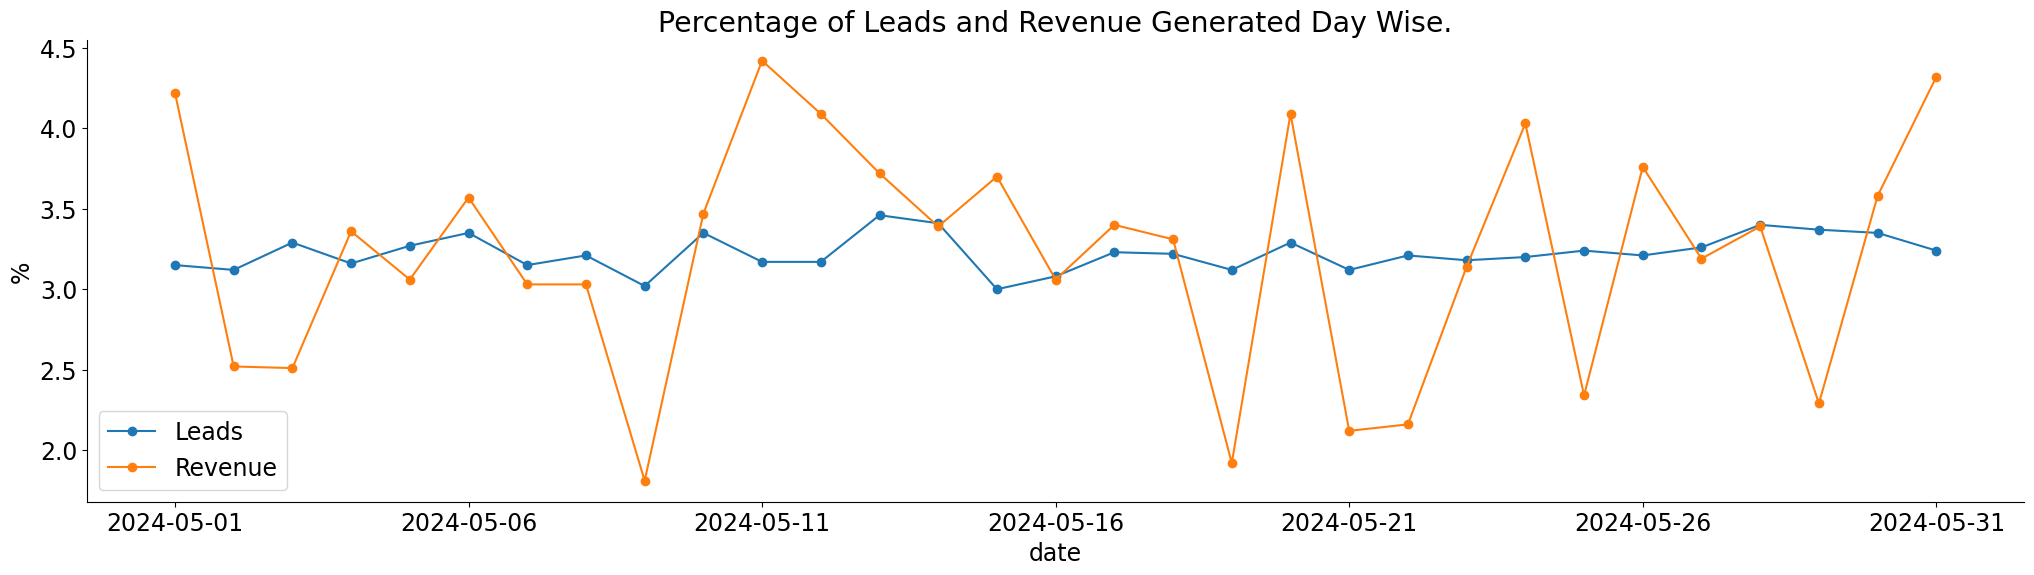

In [18]:
query = '''
select strftime("%Y-%m-%d", lead_date) as date, 
        round(count(*)*100.0/(select count(*) from leads),2) as Leads ,
        round(sum(amount_paid)*100.0/(select sum(amount_paid) from leads),2) as Revenue 
from leads group by 1 order by 1 asc
'''
date_leads = pd.read_sql(query, conn)
date_leads.set_index('date').plot(marker='o')
plt.title('Percentage of Leads and Revenue Generated Day Wise.')
plt.ylabel('%')
plt.show()

- **Observation:** In May 2024, the daily leads ranged from 3.00 to 3.46, while the revenue varied between 1.81 and 4.42. The overall average leads were approximately 3.22, and the average revenue was around 3.23.

- **So What?** : The consistent number of leads suggests stable interest in the offerings throughout the month. However, the fluctuations in revenue indicate varying effectiveness in converting leads to sales. Notably, some days with similar lead counts produced significantly different revenue, which could imply differences in lead quality or the effectiveness of sales strategies on those days.

- **Action:**  To optimize performance, analyze the correlation between daily leads and revenue to identify patterns or factors influencing higher sales. Investigate the specific circumstances of peak revenue days (e.g., promotions, events) and replicate successful strategies. Additionally, focus on improving lead quality through targeted marketing efforts to enhance conversion rates, potentially leading to increased revenue.

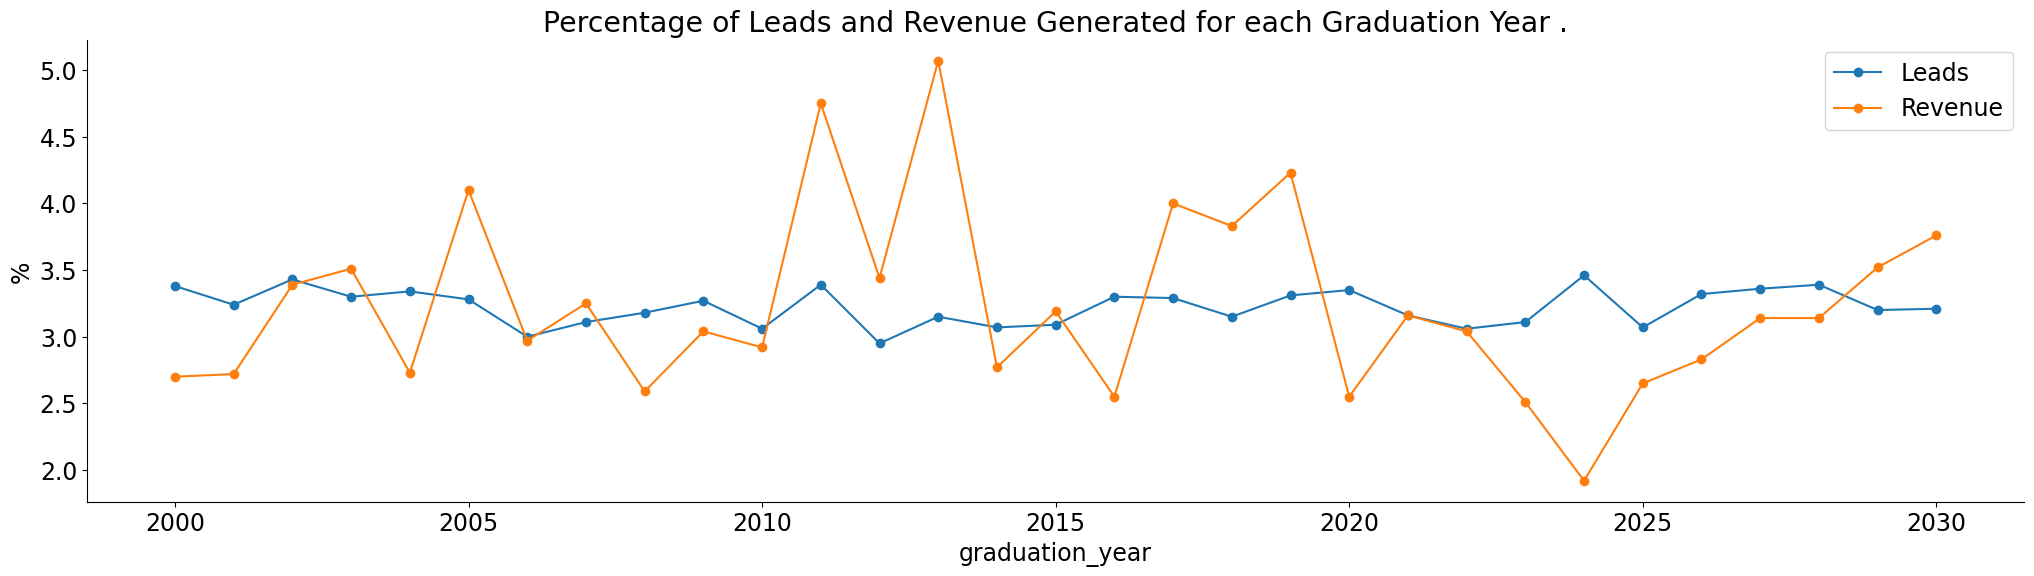

In [19]:
query = '''
select graduation_year, 
        round(count(graduation_year)*100.0/(select count(*) from leads),2) as Leads ,
        round(sum(amount_paid)*100.0/(select sum(amount_paid) from leads),2) as Revenue 
from leads group by graduation_year order by graduation_year asc
'''
grad_year = pd.read_sql(query, conn)
grad_year.set_index('graduation_year').plot(kind='line', marker='o')
plt.title('Percentage of Leads and Revenue Generated for each Graduation Year .')
plt.ylabel('%')
plt.show()

- **Observation:** The leads generated by graduation year range from 2.95 to 3.46, while the revenue varies between 1.92 and 5.07. Notably, the year 2013 has the highest revenue of 5.07, while the lowest revenue is recorded in 2024 at 1.92.

- **So What?** : The consistent lead generation suggests a stable interest across various graduation years. However, the variations in revenue indicate differing effectiveness in converting these leads to sales, particularly with a notable peak in revenue from the 2013 cohort. The decline in revenue for 2024 could imply emerging challenges in converting leads from newer graduates, possibly due to market saturation or changing consumer preferences.

- **Action:** : Analyze the factors contributing to the high revenue from the 2013 cohort, such as specific marketing strategies, products, or promotions used at that time. For 2024, investigate the barriers preventing conversion despite steady lead numbers, and refine marketing approaches to better resonate with this demographic. Targeting specific graduate cohorts with tailored offerings could enhance revenue generation across all years.

## Conclusion

The analysis reveals a clear picture of lead generation and conversion patterns within the organization. Channel A stands out as the most effective lead source, generating a significant portion of leads and boasting a high conversion rate.  However, the underperformance of Channels K, L, and J raises concerns about their return on investment.  

The data also highlights the strong demand for Python and Java courses, suggesting a focus on these areas could maximize revenue. Conversely, courses like CRM, Figma, and SEO require further investigation to understand barriers to enrollment and improve their visibility. 

Overall, the organization should prioritize optimizing its most successful channels (A, B, and D) while reevaluating the effectiveness of underperforming channels.  By focusing on lead quality, targeted marketing, and understanding the specific needs of different customer segments, the organization can improve its lead conversion rates and ultimately drive revenue growth. 
